In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [25]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [26]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

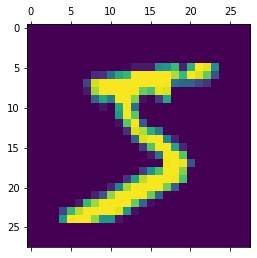

In [12]:
plt.matshow(x_train[0])

In [11]:
y_train[0]

5

In [13]:
x_train.shape

(60000, 28, 28)

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [29]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [30]:
model = keras.Sequential([
keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]
)

model.compile(
metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4701 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9257


In [31]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2665 - accuracy: 0.9248


[0.2664591372013092, 0.9247999787330627]

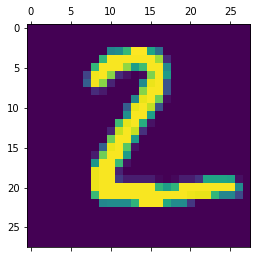

In [38]:
plt.matshow(x_test[1])

In [34]:
predictions = model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [41]:
predictions[1]

array([4.9955544e-01, 5.4921675e-03, 9.9954128e-01, 4.3500698e-01,
       6.6083938e-10, 8.6763394e-01, 8.4331483e-01, 1.5226725e-12,
       1.2981655e-01, 1.8982480e-09], dtype=float32)

In [42]:
np.argmax(predictions[1])

2

In [43]:
prediction = [np.argmax(i) for i in predictions]

In [44]:
confusion_matrix = tf.math.confusion_matrix(predictions=prediction,labels=y_test)

In [45]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   6,    8,  928,   15,    9,    5,   11,   10,   36,    4],
       [   3,    0,   20,  929,    0,   21,    2,   12,   17,    6],
       [   1,    1,    6,    2,  913,    0,    9,    4,    9,   37],
       [   8,    2,    3,   39,    7,  783,    9,    8,   27,    6],
       [  15,    3,   12,    1,    7,   20,  896,    2,    2,    0],
       [   1,    5,   21,    7,    6,    0,    0,  962,    2,   24],
       [   8,    8,    8,   31,    9,   32,    8,   14,  850,    6],
       [  11,    7,    1,   10,   23,    8,    0,   33,    6,  910]])>

Text(69.0, 0.5, 'Truth')

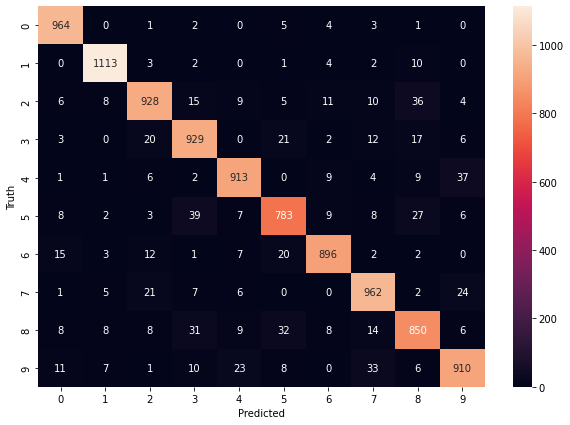

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,input_shape=(784,),activation='relu'),
keras.layers.Dense(10,activation='sigmoid')]
)

model.compile(
metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2719 - accuracy: 0.9228
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1233 - accuracy: 0.9638
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9737
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9796
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9832
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0430 - accuracy: 0.9867
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0357 - accuracy: 0.9892
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0301 - accuracy: 0.9911


In [54]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9749


[0.08628344535827637, 0.9749000072479248]

Text(69.0, 0.5, 'Truth')

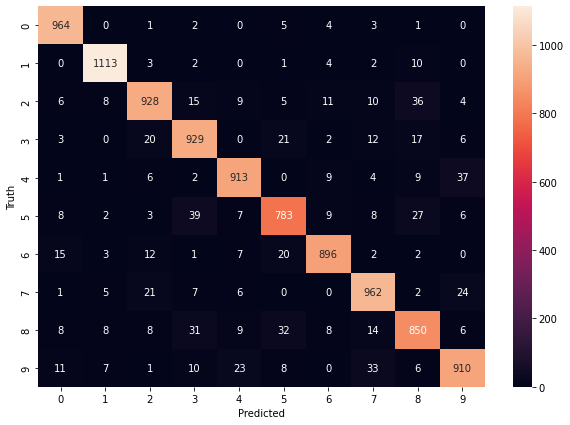

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')